## LIBRARIES

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import zero_one_loss
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## LOAD DATA

In [2]:
df = pd.read_csv('lda_data.csv')

In [3]:
X = df.loc[:,'X1':'X2']
Y = df.loc[:,'Y']

## 1-1 LDA ASSUMPTIONS 

In [4]:
cov_matrix = np.cov(np.array(X).T)

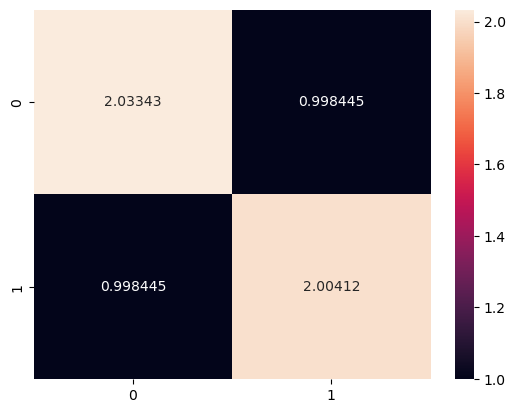

In [5]:
sn.heatmap(cov_matrix, annot=True, fmt='g')
plt.show()

In [6]:
X1_var = round(np.var(X['X1']), 4)
X2_var = round(np.var(X['X2']), 4)

print("variance of X1: ", X1_var, "\nvariance of X2: ", X2_var)

variance of X1:  2.0332 
variance of X2:  2.0039


X1 and X2 have a similar variance

(array([  1.,   0.,   2.,   4.,   5.,   7.,  13.,  21.,  26.,  36.,  60.,
         84., 105., 148., 203., 239., 259., 325., 358., 391., 391., 444.,
        411., 445., 485., 447., 397., 419., 456., 454., 419., 432., 415.,
        355., 340., 314., 277., 196., 171., 146.,  99.,  75.,  38.,  24.,
         14.,  22.,   8.,  12.,   5.,   2.]),
 array([-4.8735944 , -4.68821869, -4.50284298, -4.31746727, -4.13209156,
        -3.94671585, -3.76134014, -3.57596443, -3.39058872, -3.20521301,
        -3.0198373 , -2.83446159, -2.64908588, -2.46371017, -2.27833446,
        -2.09295875, -1.90758304, -1.72220733, -1.53683162, -1.35145591,
        -1.1660802 , -0.98070449, -0.79532878, -0.60995307, -0.42457736,
        -0.23920165, -0.05382594,  0.13154977,  0.31692548,  0.50230119,
         0.6876769 ,  0.87305261,  1.05842832,  1.24380403,  1.42917974,
         1.61455545,  1.79993116,  1.98530687,  2.17068258,  2.35605829,
         2.541434  ,  2.72680971,  2.91218542,  3.09756113,  3.28293684,
 

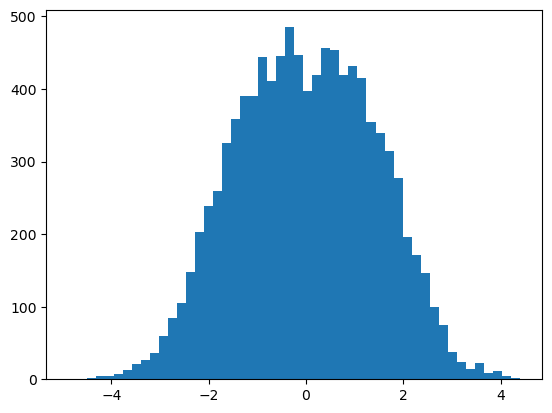

In [7]:
plt.hist(X['X1'], bins=50)

(array([  1.,   0.,   1.,   3.,   1.,   2.,   7.,  12.,  18.,  37.,  41.,
         68., 110., 135., 157., 232., 265., 315., 391., 423., 455., 445.,
        456., 469., 478., 467., 463., 469., 453., 482., 418., 421., 385.,
        392., 365., 296., 231., 187., 124., 112.,  79.,  54.,  35.,  17.,
         15.,   4.,   3.,   2.,   2.,   2.]),
 array([-5.09791973, -4.90239725, -4.70687476, -4.51135227, -4.31582979,
        -4.1203073 , -3.92478482, -3.72926233, -3.53373985, -3.33821736,
        -3.14269487, -2.94717239, -2.7516499 , -2.55612742, -2.36060493,
        -2.16508245, -1.96955996, -1.77403747, -1.57851499, -1.3829925 ,
        -1.18747002, -0.99194753, -0.79642505, -0.60090256, -0.40538007,
        -0.20985759, -0.0143351 ,  0.18118738,  0.37670987,  0.57223235,
         0.76775484,  0.96327732,  1.15879981,  1.3543223 ,  1.54984478,
         1.74536727,  1.94088975,  2.13641224,  2.33193472,  2.52745721,
         2.7229797 ,  2.91850218,  3.11402467,  3.30954715,  3.50506964,
 

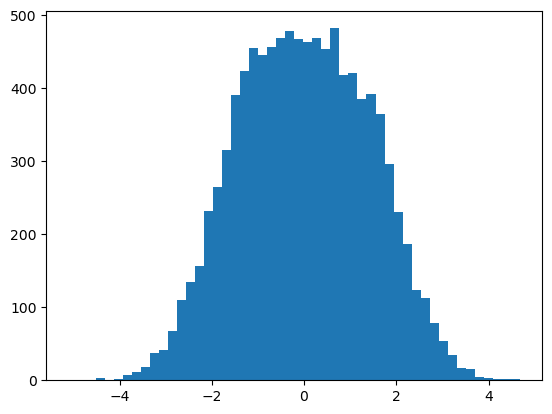

In [8]:
plt.hist(X['X2'], bins=50)

X1 and X2 have a bellshaped distribution. Distribution is normal.

## 1-2 TRAIN LDA

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [10]:
lda = LDA()
lda.fit(X_train, Y_train)
Y_pred = lda.predict(X_test)

# 1-3 ACCURACY

In [11]:
print('Accuracy -> ', round(accuracy_score(Y_test, Y_pred), 4))

Accuracy ->  0.906


## 1-4 ZERO ONE LOSS

In [12]:
zol = zero_one_loss(Y_pred, Y_test)
print("zero one loss -> ", round(zol, 4))

zero one loss ->  0.094
